In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# read in the data
df = pd.read_csv(r'C:\Users\blake\Desktop\Project\omicronsp500.csv')

In [5]:
# Looking at the data

df.head()

,day,sum_omicron_percentage,close
0,2021-11-01,0.00,4613.67
1,2021-11-15,29.10,4682.80
2,2021-11-29,226.32,4655.27
3,2021-12-10,144.17,4712.02


In [10]:
# Checking for nulls

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

day - 0.0%
sum_omicron_percentage - 0.0%
close - 0.0%


In [11]:
# Data types for our columns

df.dtypes

day                        object
sum_omicron_percentage    float64
close                     float64
dtype: object

In [21]:
# Renaming headers
df.rename(columns={'day':'date', 'sum_omicron_percentage':'Omicron_Percentage_Increase', 'close':'S&P500 closing'}, inplace = True)
df.head()

,date,Omicron_Percentage_Increase,S&P500 closing
0,2021-11-01,0.00,4613.67
1,2021-11-15,29.10,4682.80
2,2021-11-29,226.32,4655.27
3,2021-12-10,144.17,4712.02


<function matplotlib.pyplot.show(close=None, block=None)>

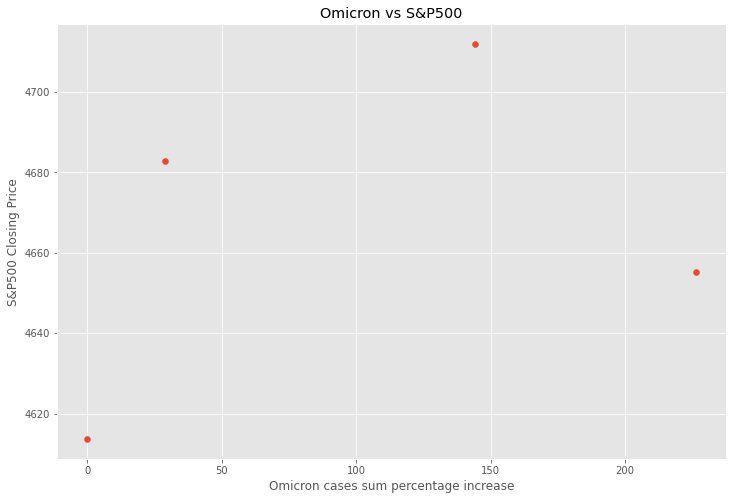

In [25]:
# Scatter plot with omicron vs S&P500

plt.scatter(x=df['Omicron_Percentage_Increase'], y=df['S&P500 closing'])
plt.title('Omicron vs S&P500')
plt.xlabel('Omicron cases sum percentage increase')
plt.ylabel('S&P500 Closing Price')
plt.show

<AxesSubplot:xlabel='Omicron_Percentage_Increase', ylabel='S&P500 closing'>

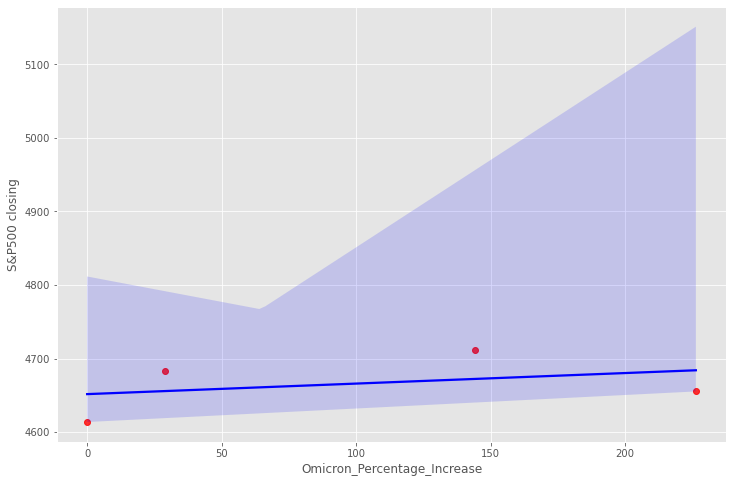

In [29]:
# Plot S&P500 vs Omicron using seaborn

sns.regplot(x='Omicron_Percentage_Increase', y='S&P500 closing',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [31]:
# Check on correlation

df.corr()

,Omicron_Percentage_Increase,S&P500 closing
Omicron_Percentage_Increase,1.000000,0.358763
S&P500 closing,0.358763,1.000000


In [32]:
# Low correlation, however sample size is small

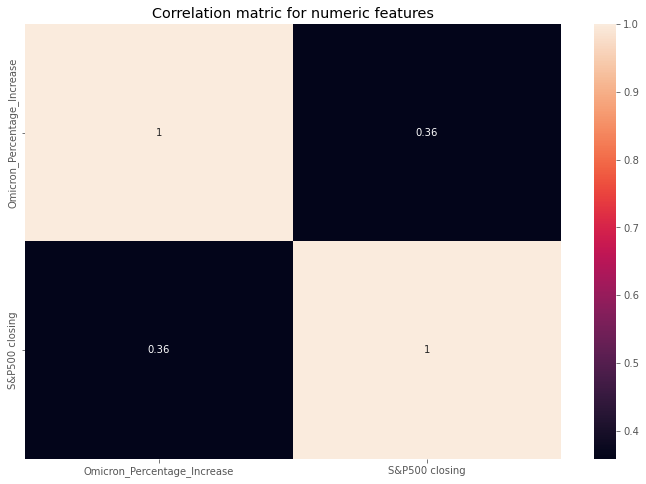

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matric for numeric features')
plt.show()

In [38]:
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Omicron_Percentage_Increase  Omicron_Percentage_Increase    1.000000
                             S&P500 closing                 0.358763
S&P500 closing               Omicron_Percentage_Increase    0.358763
                             S&P500 closing                 1.000000
dtype: float64

In [39]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Omicron_Percentage_Increase  S&P500 closing                 0.358763
S&P500 closing               Omicron_Percentage_Increase    0.358763
Omicron_Percentage_Increase  Omicron_Percentage_Increase    1.000000
S&P500 closing               S&P500 closing                 1.000000
dtype: float64

In [ ]:
# Hence Omicron and S&P500 have a low correlation
# However due to the low sample size of Omicron cases reported into database, this may not be a reliable data yet